# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core.Shape
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:54: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr.dtype, jax.dtypes.prng_key) for runtime detection of typed prng keys (i.e. keys created with jax.random.key).
For more information, see https://jax.readthedocs.io/en/latest/jep/9263-typed-keys.html
  PRNGKey = jax.random.KeyArray
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scib_metrics/_types.py:9: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.i

In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [34]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/REIyQZE6OMZm1S3W2Dxi.h5ad')
#adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
#adata = adata[:, adata.var.index.isin(genes)]
adata

AnnData object with n_obs × n_vars = 34132 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered'

In [37]:
adata.obs.tissue

06e4e8c5-1783-48b9-b531-03c03ec80f6b    ciliary body
b7adcc43-8567-4828-bda2-057832d523ee    ciliary body
83a5b2ca-2e4a-4e78-babd-856da32e46d2    ciliary body
66b20a2c-1db2-4dda-a72a-6abb9c343f27    ciliary body
0e84672b-7788-4219-88fc-2a95503cf253    ciliary body
                                            ...     
27d30bfd-6c5a-4994-be3f-32b963b6292a    ciliary body
ad4cad58-b7c8-4d9d-b095-a3c2b48112bd    ciliary body
43b6a20d-5291-4438-93d1-5bdcd9e72d3d    ciliary body
3eb2b75b-642a-43d7-88f0-4eb7aad811b3    ciliary body
a76f0281-acca-46fe-95e8-b8a5b47863a3    ciliary body
Name: tissue, Length: 34132, dtype: category
Categories (1, object): ['ciliary body']

fibroblast (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 56.22 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


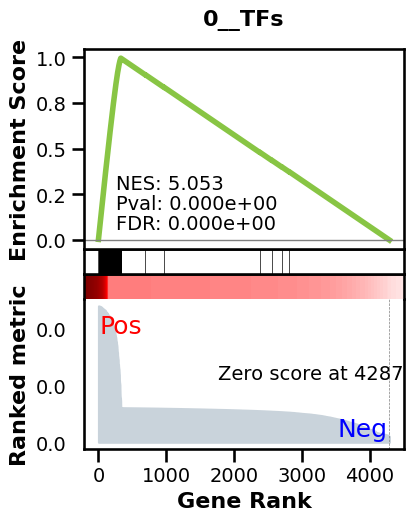

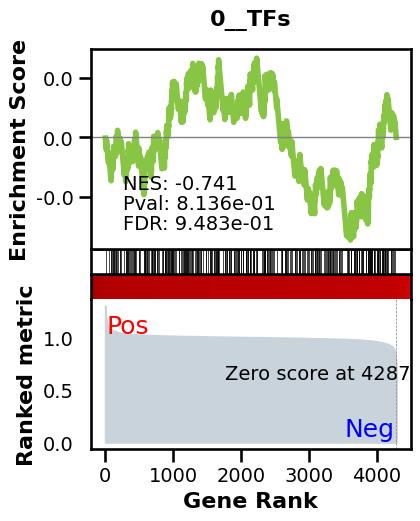

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2921 genes
intersection pct: 0.6812033582089553
precision:  0.008473975681613396 
recall:  0.5574690770694577 
random precision: 0.0012322201535409623



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 67.91it/s]


 11%|█         | 14/128 [00:00<00:01, 67.81it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.07it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.10it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.09it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.07it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.18it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.27it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.33it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.37it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.40it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.41it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.45it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.42it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.43it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.45it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.47it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.22it/s]

Average Precision (AP):  0.010581340330411373
Area Under Precision-Recall Curve (AUPRC):  0.009766532160747871
EPR: 27.44429715466902


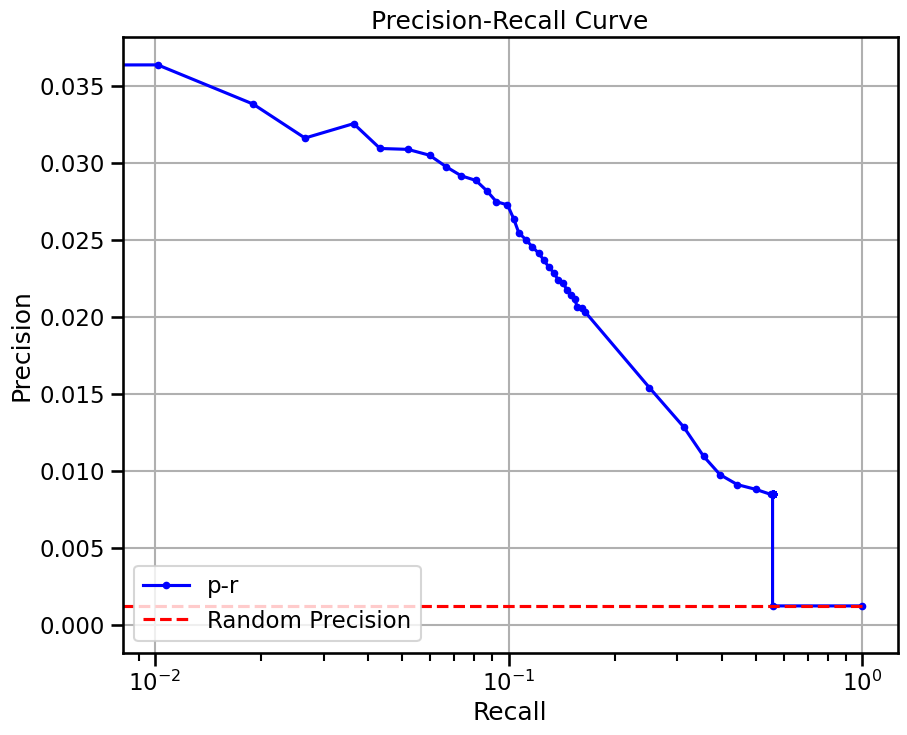

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 194.00 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


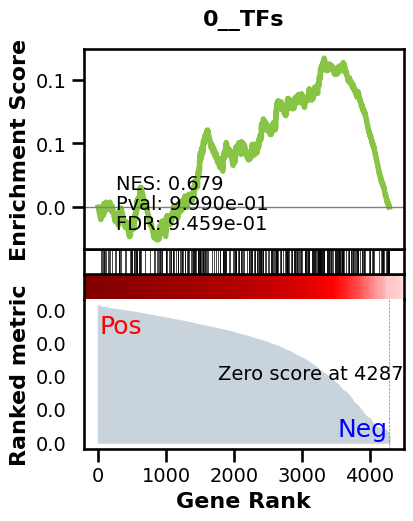

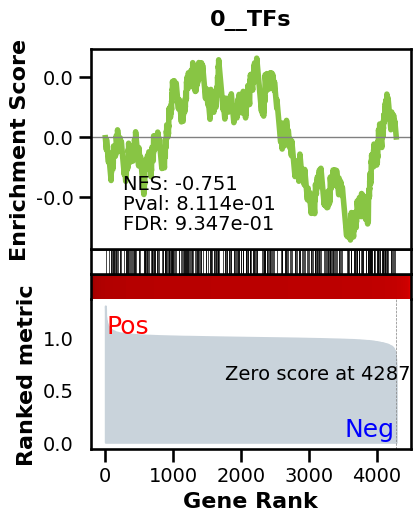

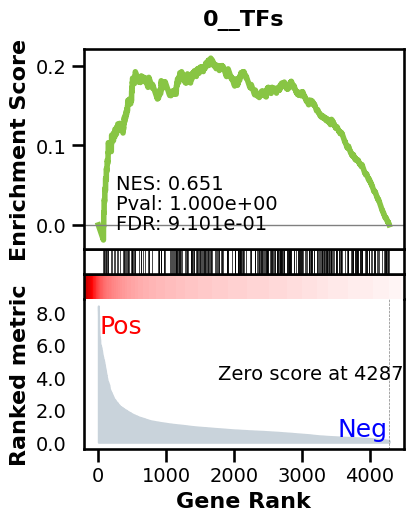

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2921 genes
intersection pct: 0.6812033582089553
precision:  0.0015348245438584795 
recall:  0.6308277830637488 
random precision: 0.0012322201535409623



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 66.28it/s]


 11%|█         | 14/128 [00:00<00:01, 66.52it/s]


 16%|█▋        | 21/128 [00:00<00:01, 66.47it/s]


 22%|██▏       | 28/128 [00:00<00:01, 66.46it/s]


 27%|██▋       | 35/128 [00:00<00:01, 66.47it/s]


 33%|███▎      | 42/128 [00:00<00:01, 66.32it/s]


 38%|███▊      | 49/128 [00:00<00:01, 66.51it/s]


 44%|████▍     | 56/128 [00:00<00:01, 66.70it/s]


 49%|████▉     | 63/128 [00:00<00:00, 66.65it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 66.70it/s]


 60%|██████    | 77/128 [00:01<00:00, 66.68it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 66.61it/s]


 71%|███████   | 91/128 [00:01<00:00, 66.64it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 66.72it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 66.70it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 66.69it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 66.58it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 66.61it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 66.57it/s]

Average Precision (AP):  0.001717304690022218
Area Under Precision-Recall Curve (AUPRC):  0.001639072873168789
EPR: 3.3394042588676407


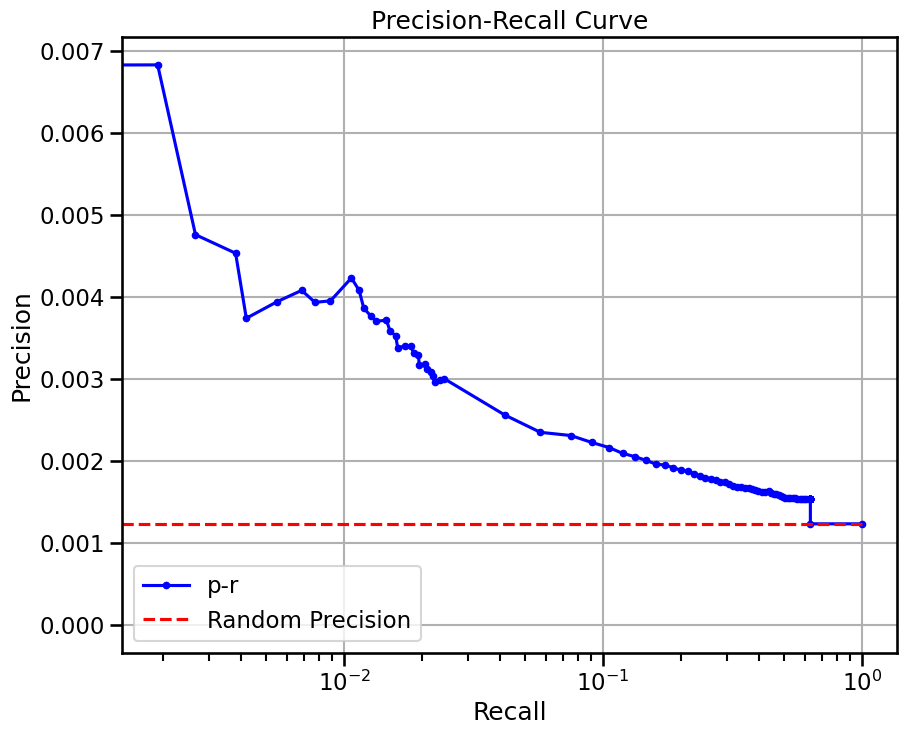

endothelial cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 91.99 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


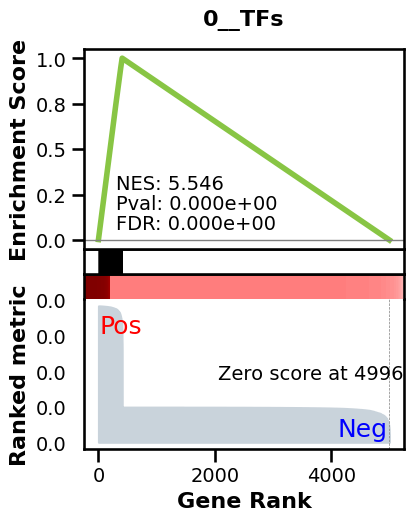

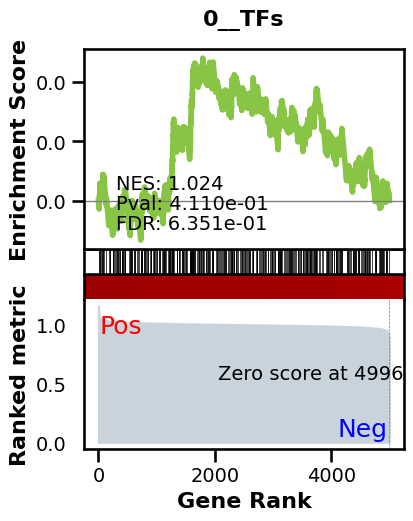

_________________________________________
TF specific enrichment


found some significant results for  9.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3648 genes
intersection pct: 0.7300380228136882
precision:  0.007261577307028081 
recall:  0.4117672925552966 
random precision: 0.0017093026472130423



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 33.13it/s]


  6%|▋         | 8/128 [00:00<00:03, 33.05it/s]


  9%|▉         | 12/128 [00:00<00:03, 33.08it/s]


 12%|█▎        | 16/128 [00:00<00:03, 33.06it/s]


 16%|█▌        | 20/128 [00:00<00:03, 33.11it/s]


 19%|█▉        | 24/128 [00:00<00:03, 32.96it/s]


 22%|██▏       | 28/128 [00:00<00:03, 32.97it/s]


 25%|██▌       | 32/128 [00:00<00:02, 33.03it/s]


 28%|██▊       | 36/128 [00:01<00:02, 33.06it/s]


 31%|███▏      | 40/128 [00:01<00:02, 33.09it/s]


 34%|███▍      | 44/128 [00:01<00:02, 33.09it/s]


 38%|███▊      | 48/128 [00:01<00:02, 33.06it/s]


 41%|████      | 52/128 [00:01<00:02, 33.05it/s]


 44%|████▍     | 56/128 [00:01<00:02, 33.09it/s]


 47%|████▋     | 60/128 [00:01<00:02, 33.09it/s]


 50%|█████     | 64/128 [00:01<00:01, 33.10it/s]


 53%|█████▎    | 68/128 [00:02<00:01, 33.08it/s]


 56%|█████▋    | 72/128 [00:02<00:01, 33.08it/s]


 59%|█████▉    | 76/128 [00:02<00:01, 33.10it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 33.12it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 33.16it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 33.14it/s]


 72%|███████▏  | 92/128 [00:02<00:01, 33.16it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 33.16it/s]


 78%|███████▊  | 100/128 [00:03<00:00, 33.13it/s]


 81%|████████▏ | 104/128 [00:03<00:00, 33.17it/s]


 84%|████████▍ | 108/128 [00:03<00:00, 33.17it/s]


 88%|████████▊ | 112/128 [00:03<00:00, 33.20it/s]


 91%|█████████ | 116/128 [00:03<00:00, 33.19it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 33.08it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 33.07it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 32.98it/s]


100%|██████████| 128/128 [00:03<00:00, 33.08it/s]

Average Precision (AP):  0.0061389223097906434
Area Under Precision-Recall Curve (AUPRC):  0.005496669238230861
EPR: 11.564449886559897


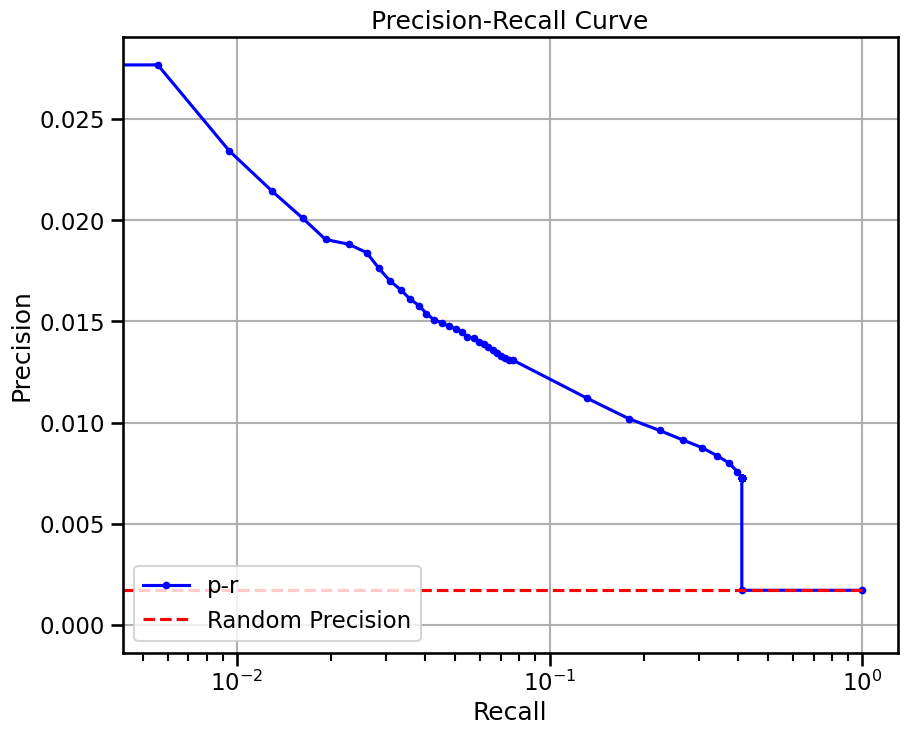

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 303.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


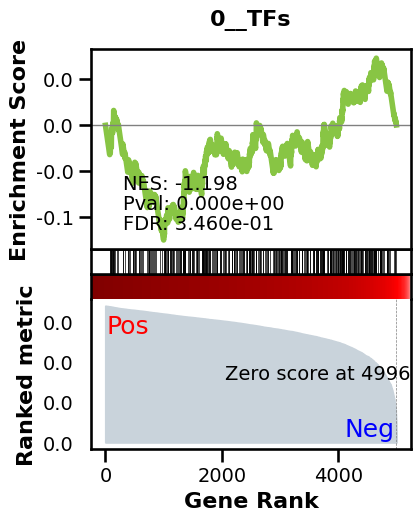

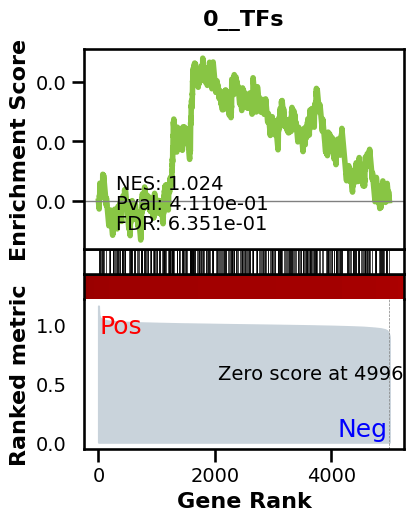

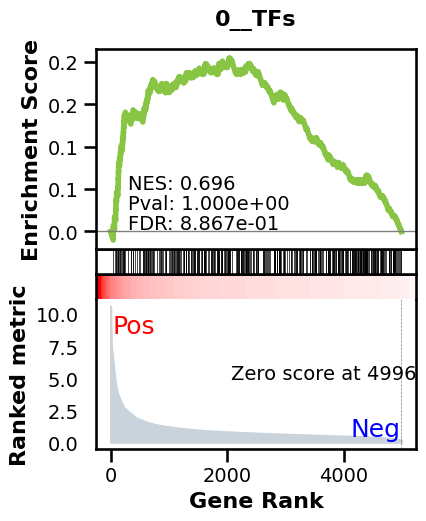

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3648 genes
intersection pct: 0.7300380228136882
precision:  0.0018898491529016266 
recall:  0.7241546106151884 
random precision: 0.0017093026472130423



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.77it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.84it/s]


 12%|█▏        | 15/128 [00:00<00:02, 42.89it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.85it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.84it/s]


 23%|██▎       | 30/128 [00:00<00:02, 42.72it/s]


 27%|██▋       | 35/128 [00:00<00:02, 42.70it/s]


 31%|███▏      | 40/128 [00:00<00:02, 42.60it/s]


 35%|███▌      | 45/128 [00:01<00:01, 42.62it/s]


 39%|███▉      | 50/128 [00:01<00:01, 42.58it/s]


 43%|████▎     | 55/128 [00:01<00:01, 42.60it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.60it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.60it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 42.59it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 42.59it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 42.54it/s]


 66%|██████▋   | 85/128 [00:01<00:01, 42.47it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.42it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 42.44it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 42.46it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.47it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.38it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.19it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.26it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.26it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 42.51it/s]

Average Precision (AP):  0.0019351339311662118
Area Under Precision-Recall Curve (AUPRC):  0.0018955720110510358


EPR: 2.690929824337943


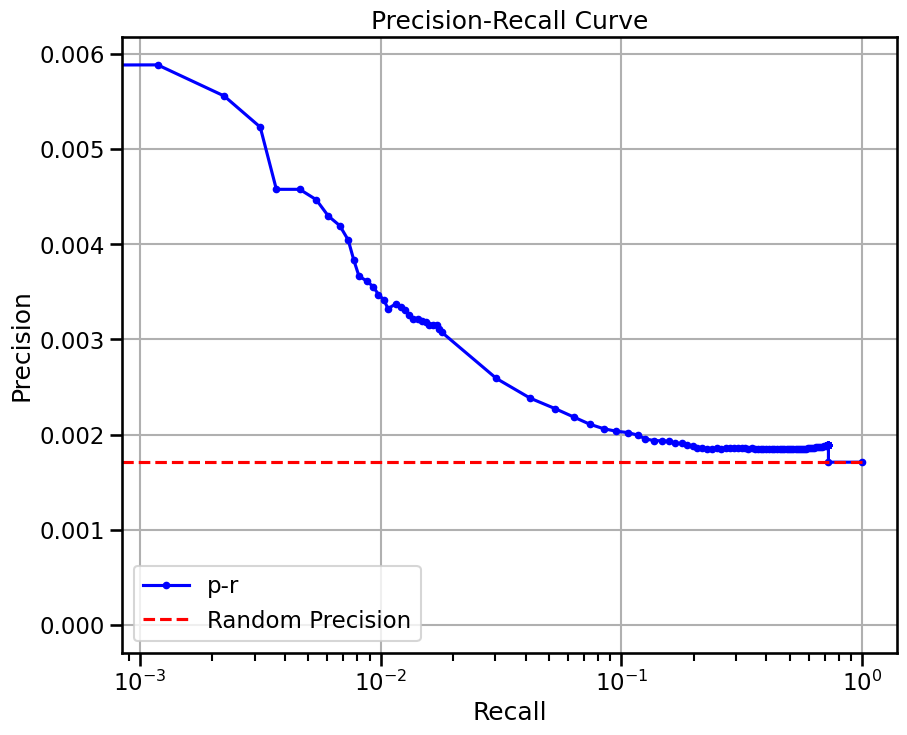

myofibroblast cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 66.39 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


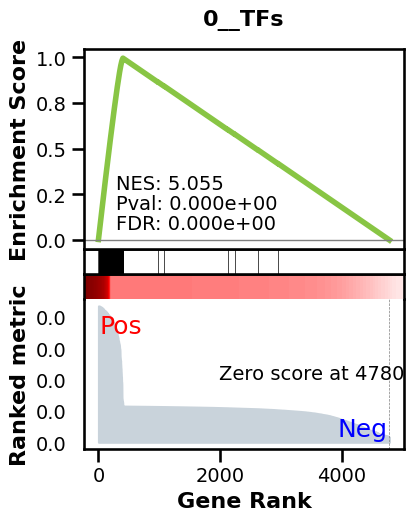

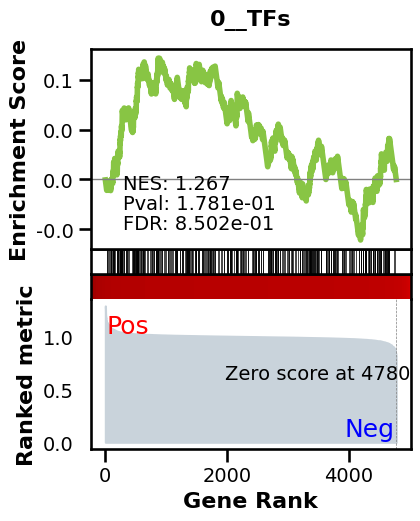

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3225 genes
intersection pct: 0.6745450742522485
precision:  0.0015879869400036945 
recall:  0.22846621837976305 
random precision: 0.0006007271048531364



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 57.13it/s]


  9%|▉         | 12/128 [00:00<00:02, 57.26it/s]


 14%|█▍        | 18/128 [00:00<00:01, 57.31it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 57.32it/s]


 28%|██▊       | 36/128 [00:00<00:01, 57.34it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.39it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.38it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.45it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.44it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 57.42it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 57.45it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.42it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.44it/s]


 70%|███████   | 90/128 [00:01<00:00, 57.38it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 57.38it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 57.38it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 57.36it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 57.37it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 57.39it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 57.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 57.36it/s]

Average Precision (AP):  0.001011454504061858
Area Under Precision-Recall Curve (AUPRC):  0.000905885018334783
EPR: 4.012167330523984


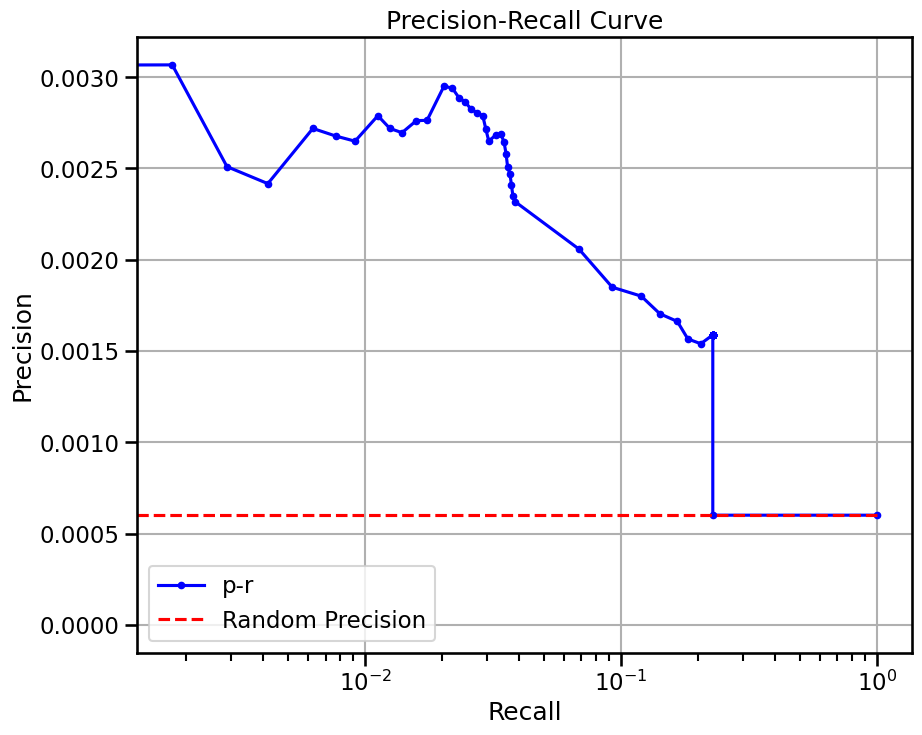

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 201.74 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


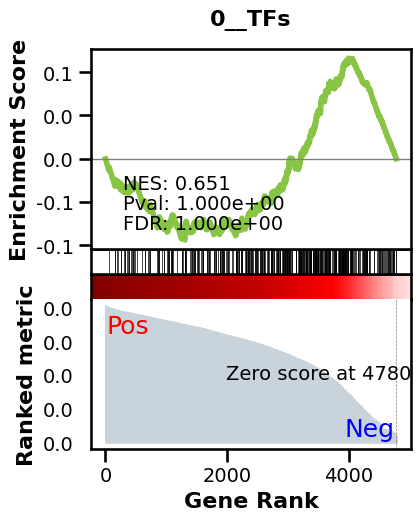

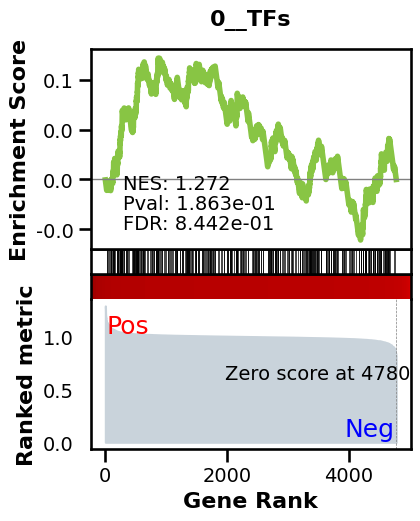

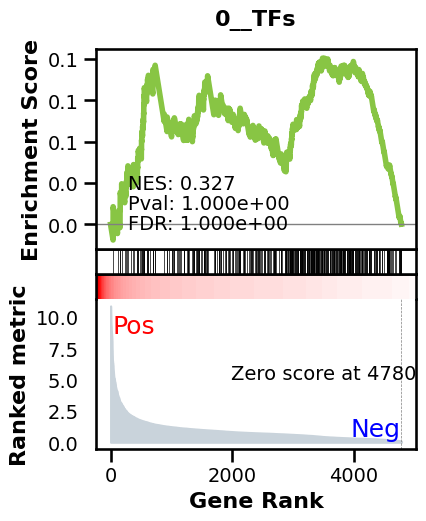

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3225 genes
intersection pct: 0.6745450742522485
precision:  0.0007044011180864834 
recall:  0.5440281780339418 
random precision: 0.0006007271048531364



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.61it/s]


  8%|▊         | 10/128 [00:00<00:02, 47.66it/s]


 12%|█▏        | 15/128 [00:00<00:02, 47.63it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.64it/s]


 20%|█▉        | 25/128 [00:00<00:02, 47.60it/s]


 23%|██▎       | 30/128 [00:00<00:02, 47.64it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.60it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.60it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.54it/s]


 39%|███▉      | 50/128 [00:01<00:01, 47.55it/s]


 43%|████▎     | 55/128 [00:01<00:01, 47.57it/s]


 47%|████▋     | 60/128 [00:01<00:01, 47.58it/s]


 51%|█████     | 65/128 [00:01<00:01, 47.58it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 47.57it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 47.62it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 47.61it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 47.62it/s]


 70%|███████   | 90/128 [00:01<00:00, 47.67it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 47.69it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 47.67it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.67it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.68it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.69it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.72it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.68it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.61it/s]

Average Precision (AP):  0.0006774753754008064
Area Under Precision-Recall Curve (AUPRC):  0.0006664405462677888
EPR: 0.7993507076796748


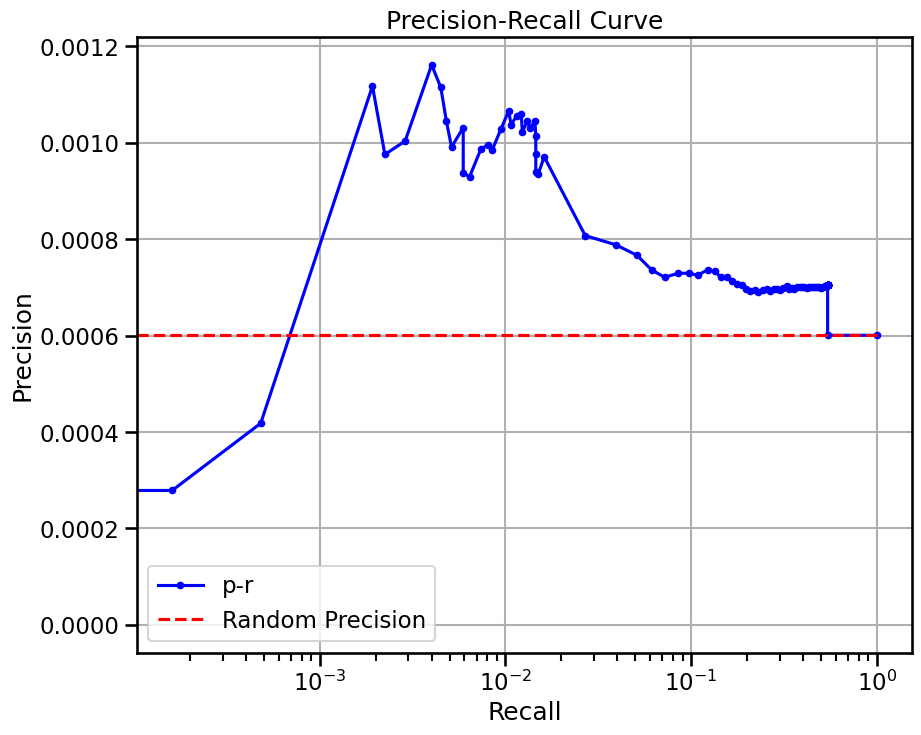

glial cell (1018, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 35.78 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


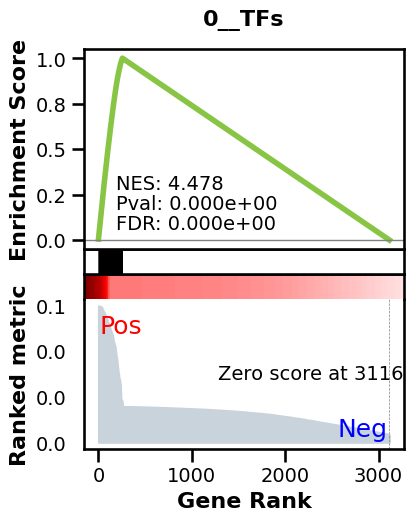

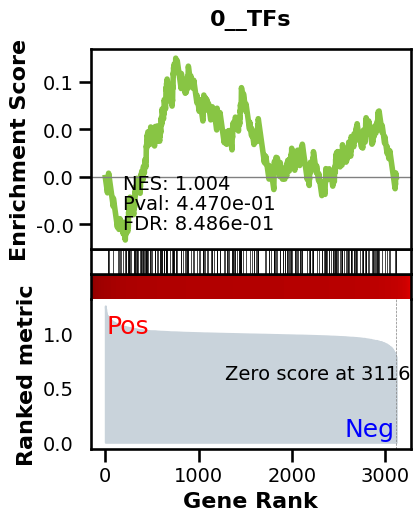

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2091 genes
intersection pct: 0.670837343599615
precision:  0.003663003663003663 
recall:  0.30940658201606636 
random precision: 0.0008830279690356712



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 132.21it/s]


 22%|██▏       | 28/128 [00:00<00:00, 131.85it/s]


 33%|███▎      | 42/128 [00:00<00:00, 132.23it/s]


 44%|████▍     | 56/128 [00:00<00:00, 132.62it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 132.90it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 133.02it/s]


 77%|███████▋  | 98/128 [00:00<00:00, 132.92it/s]


 88%|████████▊ | 112/128 [00:00<00:00, 132.99it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 133.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 132.73it/s]

Average Precision (AP):  0.0025050700887062887
Area Under Precision-Recall Curve (AUPRC):  0.0022314706435921884
EPR: 8.624540967625384


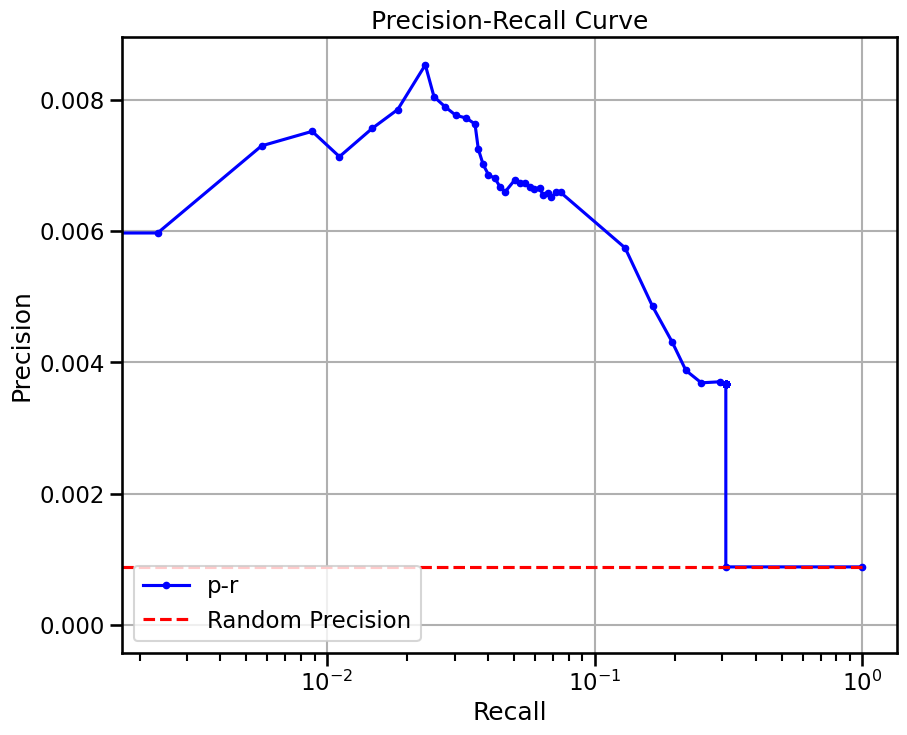

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 77.75 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


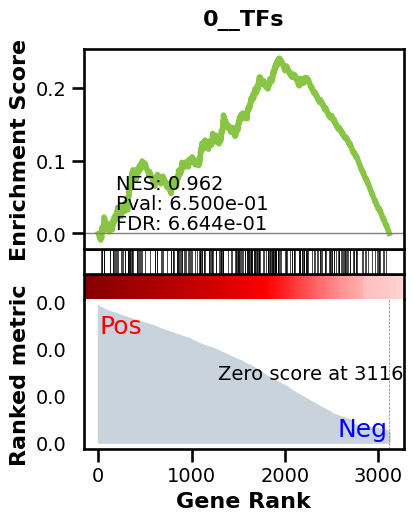

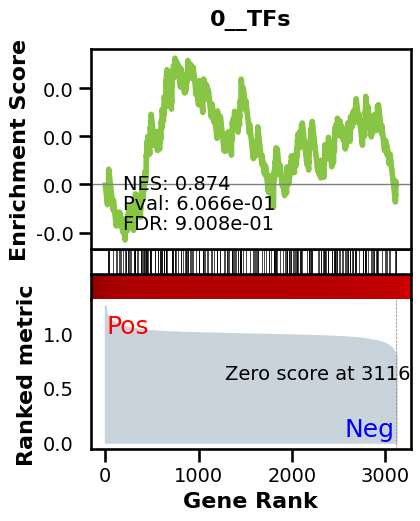

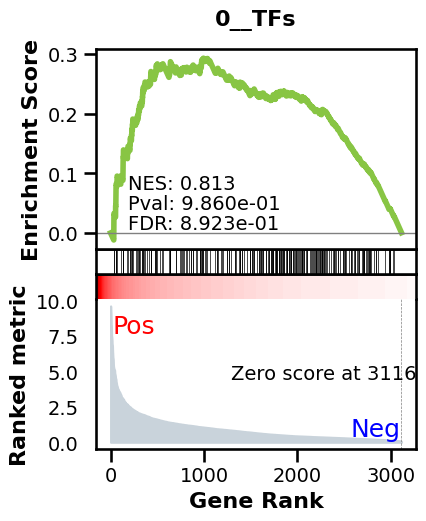

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2091 genes
intersection pct: 0.670837343599615
precision:  0.0010866698652465818 
recall:  0.44311997926924074 
random precision: 0.0008830279690356712



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 133.00it/s]


 22%|██▏       | 28/128 [00:00<00:00, 133.58it/s]


 33%|███▎      | 42/128 [00:00<00:00, 133.74it/s]


 44%|████▍     | 56/128 [00:00<00:00, 133.09it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 131.87it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 130.64it/s]


 77%|███████▋  | 98/128 [00:00<00:00, 129.79it/s]


 87%|████████▋ | 111/128 [00:00<00:00, 129.23it/s]


 97%|█████████▋| 124/128 [00:00<00:00, 128.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 130.39it/s]

Average Precision (AP):  0.0010624886675943315
Area Under Precision-Recall Curve (AUPRC):  0.0010502850112739496
EPR: 1.4685195548253334


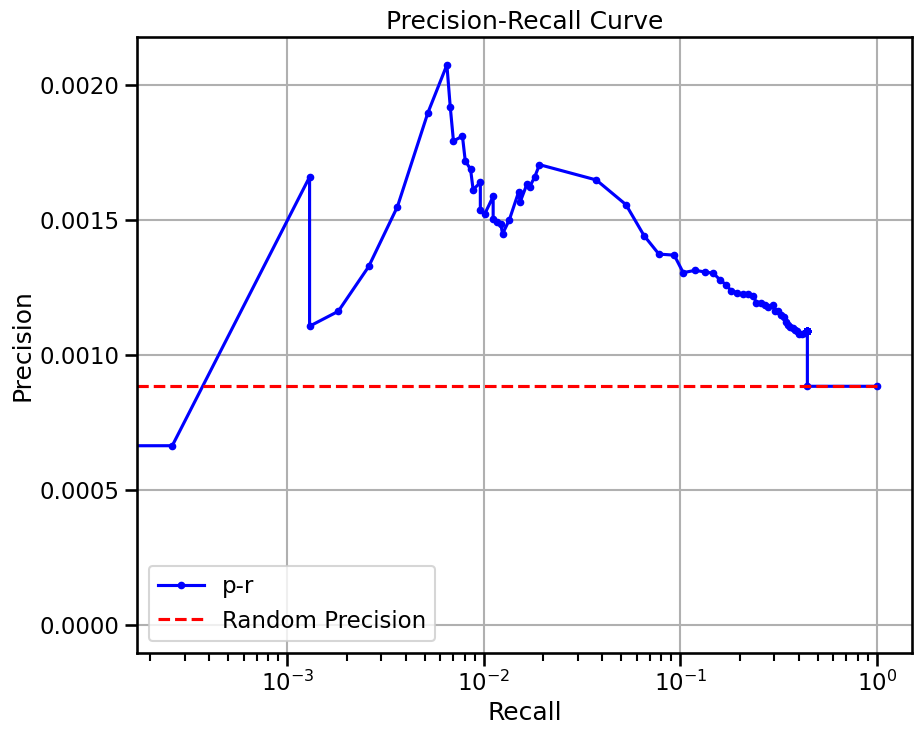

pericyte (770, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 45.99 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


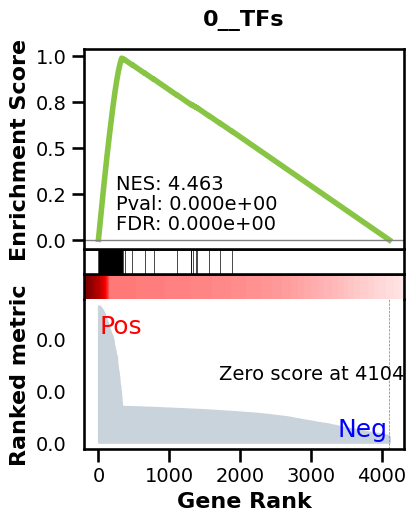

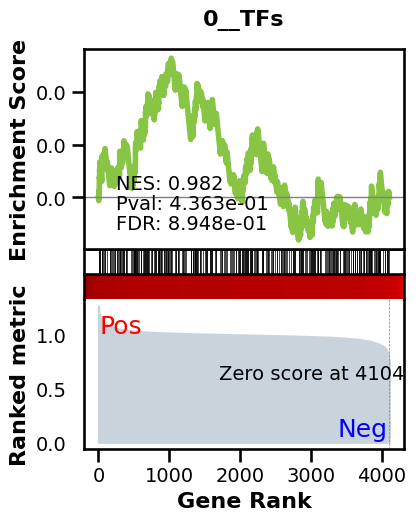

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2831 genes
intersection pct: 0.6896467722289891
precision:  0.005544484587952987 
recall:  0.3691717607575213 
random precision: 0.0010413481233141906



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 72.88it/s]


 12%|█▎        | 16/128 [00:00<00:01, 72.92it/s]


 19%|█▉        | 24/128 [00:00<00:01, 73.03it/s]


 25%|██▌       | 32/128 [00:00<00:01, 73.11it/s]


 31%|███▏      | 40/128 [00:00<00:01, 73.10it/s]


 38%|███▊      | 48/128 [00:00<00:01, 72.96it/s]


 44%|████▍     | 56/128 [00:00<00:00, 73.04it/s]


 50%|█████     | 64/128 [00:00<00:00, 73.11it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 73.13it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 73.15it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 73.13it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 73.13it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 73.13it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 73.14it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 73.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 73.11it/s]


100%|██████████| 128/128 [00:01<00:00, 73.08it/s]

Average Precision (AP):  0.004179030357040858
Area Under Precision-Recall Curve (AUPRC):  0.003786674796539158
EPR: 15.286504156615502


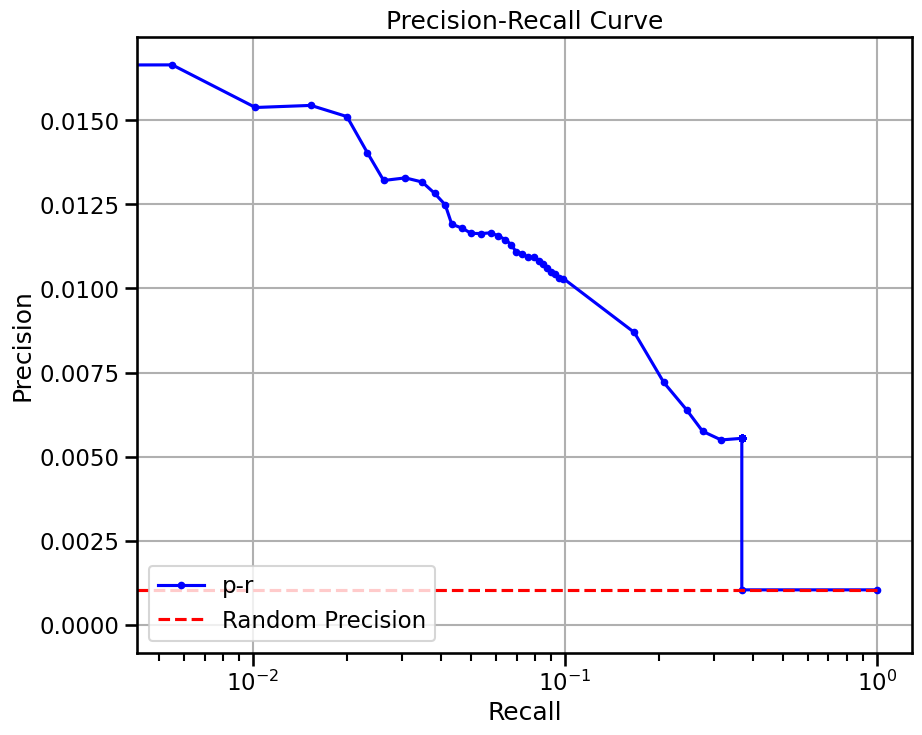

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 103.13 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


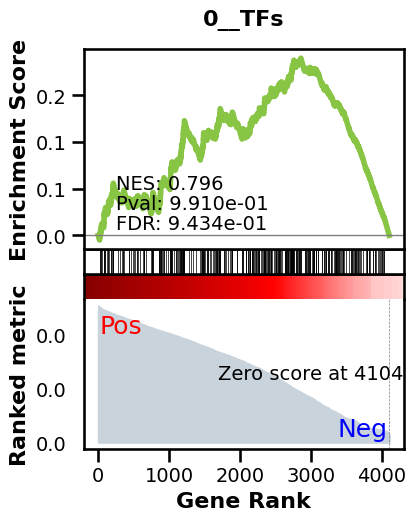

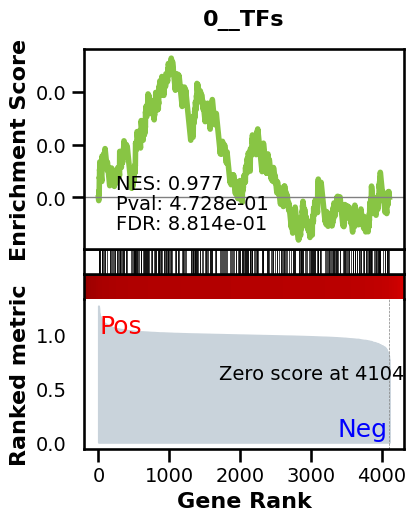

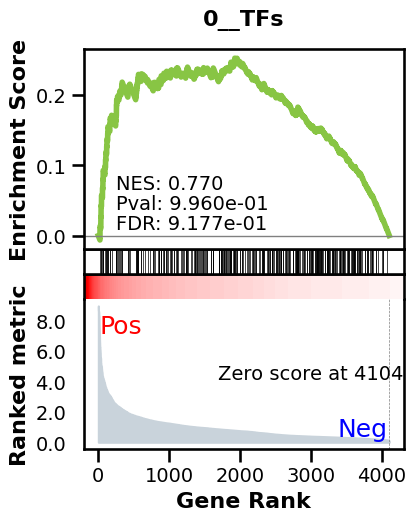

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2831 genes
intersection pct: 0.6896467722289891
precision:  0.0013496317297609817 
recall:  0.4594270646050581 
random precision: 0.0010413481233141906



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 77.10it/s]


 12%|█▎        | 16/128 [00:00<00:01, 76.94it/s]


 19%|█▉        | 24/128 [00:00<00:01, 76.99it/s]


 25%|██▌       | 32/128 [00:00<00:01, 76.99it/s]


 31%|███▏      | 40/128 [00:00<00:01, 76.93it/s]


 38%|███▊      | 48/128 [00:00<00:01, 77.00it/s]


 44%|████▍     | 56/128 [00:00<00:00, 76.90it/s]


 50%|█████     | 64/128 [00:00<00:00, 76.95it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 76.87it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 76.91it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 76.92it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 76.94it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 76.98it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 76.89it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 76.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 76.80it/s]


100%|██████████| 128/128 [00:01<00:00, 76.88it/s]

Average Precision (AP):  0.001277372771259918
Area Under Precision-Recall Curve (AUPRC):  0.001242405418570384
EPR: 2.308299465433016


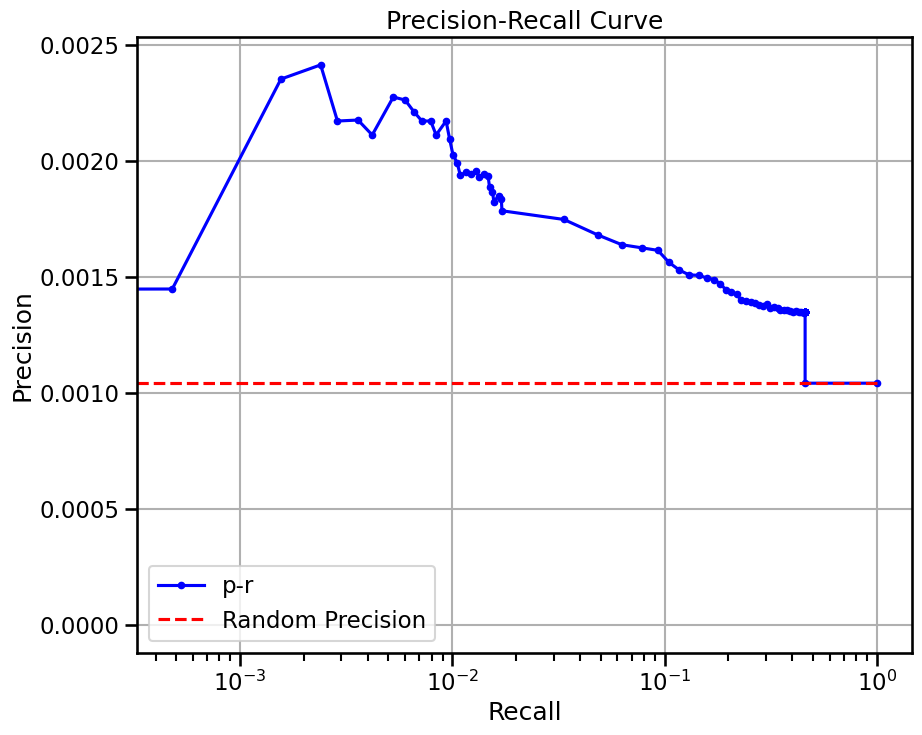

lymphocyte (366, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 41.64 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


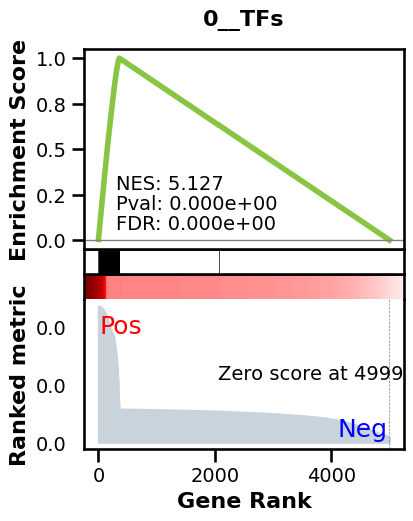

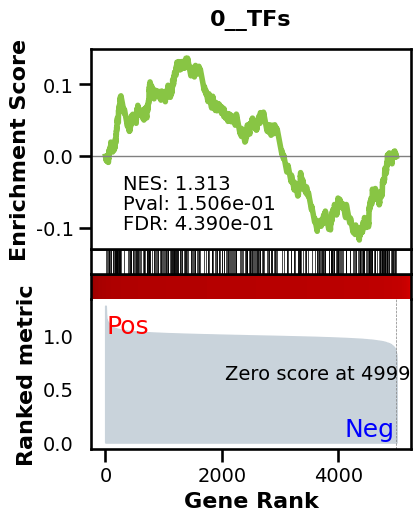

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3485 genes
intersection pct: 0.697
precision:  0.0066399572456241306 
recall:  0.40423031727379555 
random precision: 0.0011214208177740587



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 46.51it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.48it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.56it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.46it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.45it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.40it/s]


 27%|██▋       | 35/128 [00:00<00:02, 46.44it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.56it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.50it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.31it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.31it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.35it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.43it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.50it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.53it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.50it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.56it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.54it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.55it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.48it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.49it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.50it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 46.51it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 46.50it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.47it/s]

Average Precision (AP):  0.004729767026629821
Area Under Precision-Recall Curve (AUPRC):  0.004302060888647598
EPR: 11.322640915510362


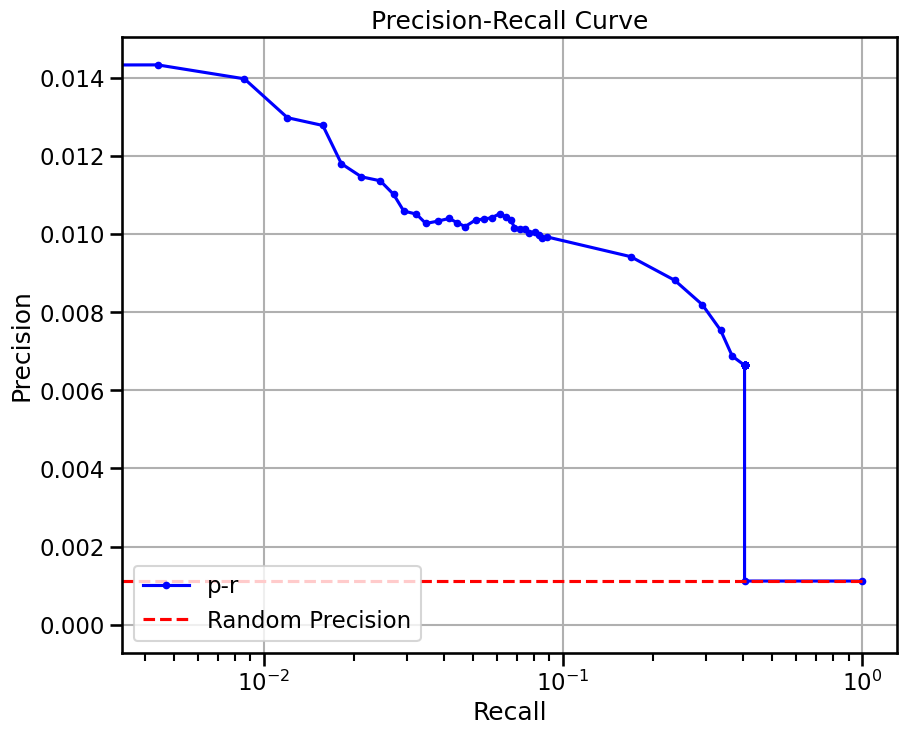

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 83.88 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


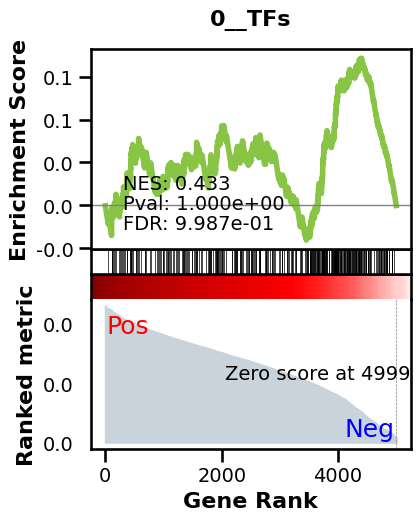

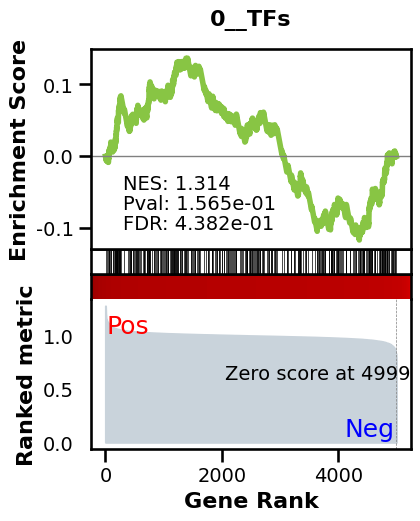

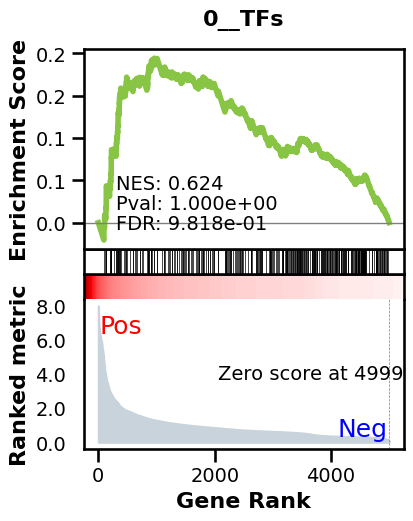

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3485 genes
intersection pct: 0.697
precision:  0.0013546955086137296 
recall:  0.4009988249118684 
random precision: 0.0011214208177740587



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.57it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.56it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.59it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.67it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.72it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.73it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.70it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.69it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.73it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.69it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.69it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.70it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.71it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.71it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.72it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.78it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.78it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.73it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.74it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.74it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.74it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.71it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.70it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.76it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.76it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.71it/s]

Average Precision (AP):  0.001224350375569298
Area Under Precision-Recall Curve (AUPRC):  0.0011934282947379932
EPR: 2.3648850319169012


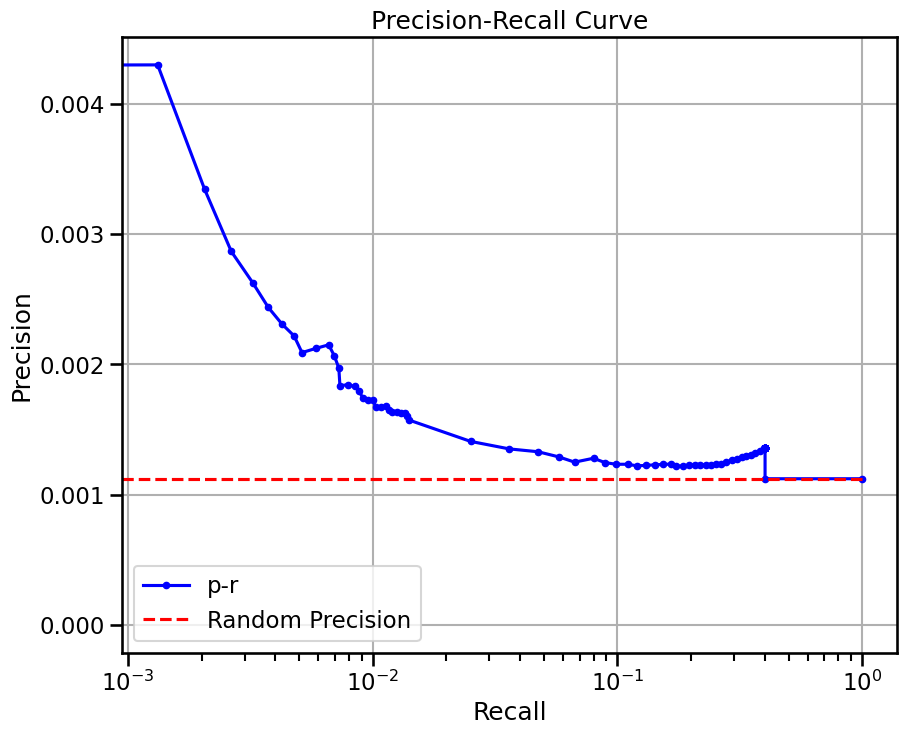

stromal cell (259, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 42.09 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


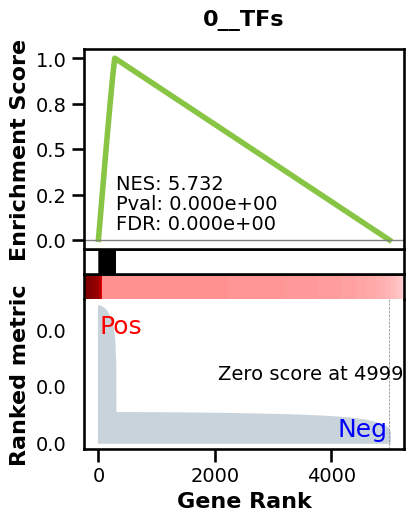

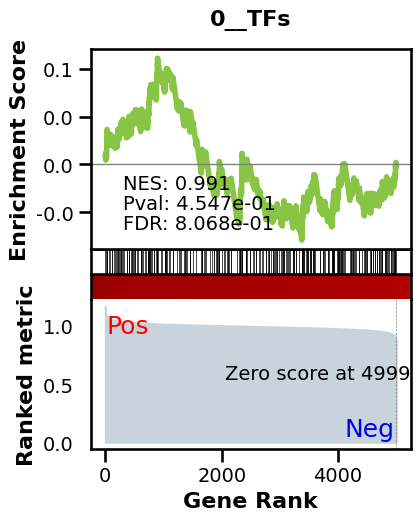

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3467 genes
intersection pct: 0.6934
precision:  0.006413909771035182 
recall:  0.36023807795601365 
random precision: 0.001146495246334619



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 39.43it/s]


  6%|▋         | 8/128 [00:00<00:03, 39.62it/s]


  9%|▉         | 12/128 [00:00<00:02, 39.71it/s]


 12%|█▎        | 16/128 [00:00<00:02, 39.61it/s]


 16%|█▌        | 20/128 [00:00<00:02, 39.68it/s]


 19%|█▉        | 24/128 [00:00<00:02, 39.77it/s]


 22%|██▏       | 28/128 [00:00<00:02, 39.79it/s]


 26%|██▌       | 33/128 [00:00<00:02, 39.93it/s]


 29%|██▉       | 37/128 [00:00<00:02, 39.92it/s]


 32%|███▏      | 41/128 [00:01<00:02, 39.93it/s]


 35%|███▌      | 45/128 [00:01<00:02, 39.89it/s]


 38%|███▊      | 49/128 [00:01<00:01, 39.91it/s]


 41%|████▏     | 53/128 [00:01<00:01, 39.92it/s]


 45%|████▍     | 57/128 [00:01<00:01, 39.93it/s]


 48%|████▊     | 62/128 [00:01<00:01, 39.97it/s]


 52%|█████▏    | 67/128 [00:01<00:01, 40.00it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 39.98it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 39.97it/s]


 63%|██████▎   | 81/128 [00:02<00:01, 40.01it/s]


 67%|██████▋   | 86/128 [00:02<00:01, 40.07it/s]


 71%|███████   | 91/128 [00:02<00:00, 40.11it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 40.06it/s]


 79%|███████▉  | 101/128 [00:02<00:00, 40.12it/s]


 83%|████████▎ | 106/128 [00:02<00:00, 40.10it/s]


 87%|████████▋ | 111/128 [00:02<00:00, 40.10it/s]


 91%|█████████ | 116/128 [00:02<00:00, 40.12it/s]


 95%|█████████▍| 121/128 [00:03<00:00, 40.15it/s]


 98%|█████████▊| 126/128 [00:03<00:00, 40.18it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 39.97it/s]

Average Precision (AP):  0.005047426718414279
Area Under Precision-Recall Curve (AUPRC):  0.004490897006063864
EPR: 14.081974936900872


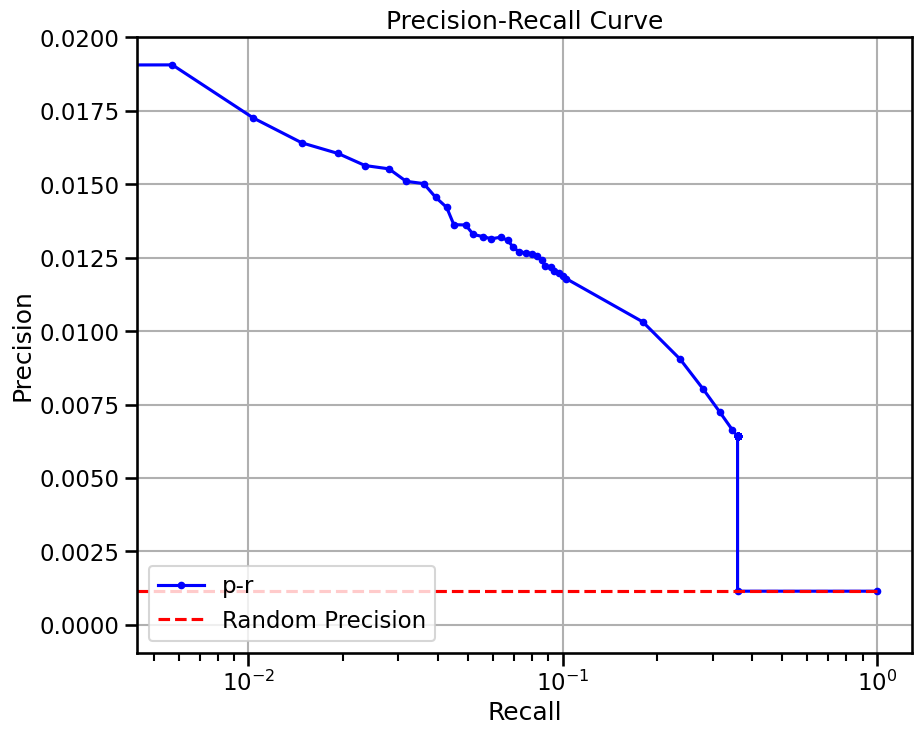

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 73.72 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


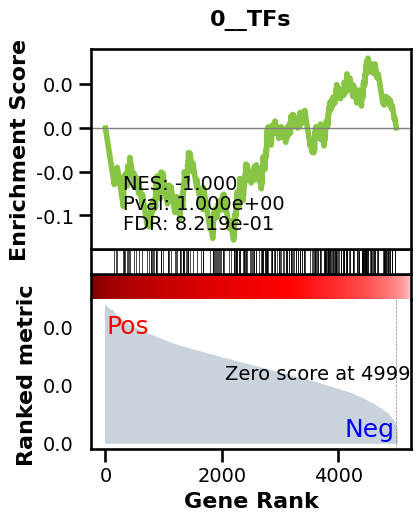

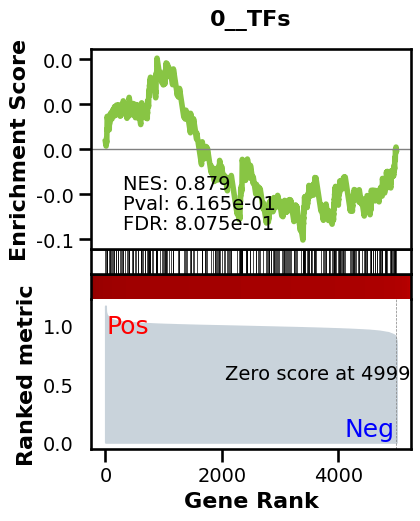

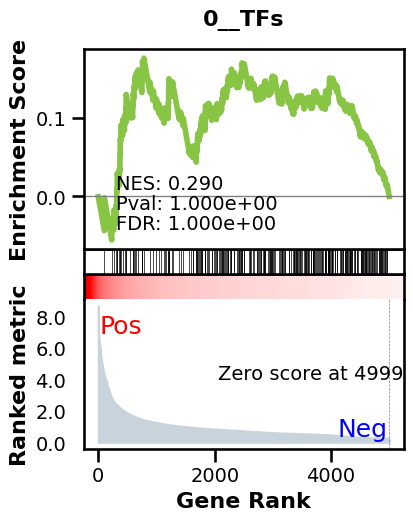

_________________________________________
TF specific enrichment


found some significant results for  5.882352941176471 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3467 genes
intersection pct: 0.6934
precision:  0.0013748716007185835 
recall:  0.3969659577556798 
random precision: 0.001146495246334619



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 48.63it/s]


  8%|▊         | 10/128 [00:00<00:02, 48.79it/s]


 12%|█▏        | 15/128 [00:00<00:02, 48.60it/s]


 16%|█▌        | 20/128 [00:00<00:02, 48.56it/s]


 20%|█▉        | 25/128 [00:00<00:02, 48.61it/s]


 23%|██▎       | 30/128 [00:00<00:02, 48.74it/s]


 27%|██▋       | 35/128 [00:00<00:01, 48.66it/s]


 31%|███▏      | 40/128 [00:00<00:01, 48.64it/s]


 35%|███▌      | 45/128 [00:00<00:01, 48.57it/s]


 39%|███▉      | 50/128 [00:01<00:01, 48.66it/s]


 43%|████▎     | 55/128 [00:01<00:01, 48.65it/s]


 47%|████▋     | 60/128 [00:01<00:01, 48.75it/s]


 51%|█████     | 65/128 [00:01<00:01, 48.83it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 48.83it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 48.74it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 48.76it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 48.77it/s]


 70%|███████   | 90/128 [00:01<00:00, 48.81it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 48.86it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 48.91it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 48.99it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 49.02it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 49.08it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 49.10it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 49.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 48.80it/s]

Average Precision (AP):  0.0012722731410069598
Area Under Precision-Recall Curve (AUPRC):  0.0012462253278649738
EPR: 2.7331366794364937


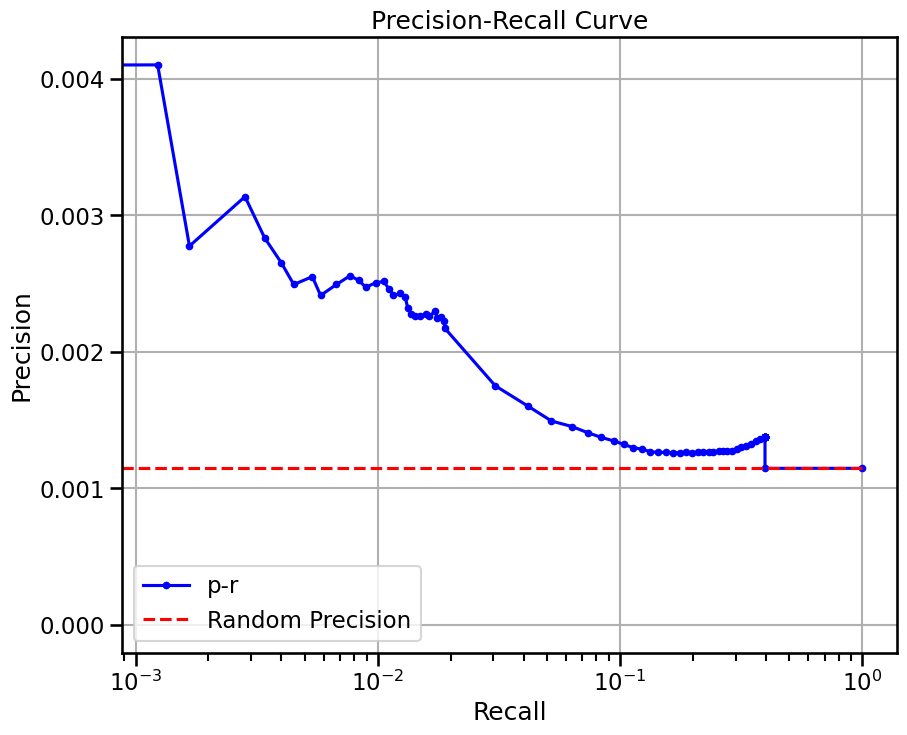

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(to_use)]
    print(celltype, subadata.shape)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                        do_auc=True, doplot=True).scprint_benchmark()

In [6]:
metrics

{'genie3_tf_fibroblast': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Microfold cells',
   'celltype.gmt__Fibroblasts',
   'celltype.gmt__Stromal cells',
   'celltype.gmt__Mesangial cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Pancreatic stellate cells',
   'celltype.gmt__Alpha cells',
   'celltype.gmt__Odontoblasts',
   'celltype.gmt__Retinal progenitor cells',
   'celltype.gmt__Pancreatic progenitor cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Delta cells'],
  'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Acinar cells'],
  'significant_enriched_TFtargets': 12.5,
  'precision': 0.008473975681613396,
  'recall': 0.5574690770694577,
  'rand_precision': 0.0012322201535409623,
  'auprc': 0.009766532160747871,
  'ap': 0.010581340330411373,
  'epr': 27.44429715466902},
 'genie3_fibroblast'

In [7]:
True
True
True
True
True
True
True
True
False
False
False
False
True
True

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3469624223.py, line 15)

In [3]:
import pandas as pd

In [4]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,fibroblast,27.444297,0.009767,0.001232,12.500000,True,True
1,fibroblast,3.339404,0.001639,0.001232,12.500000,False,False
2,endothelial cell,11.564450,0.005497,0.001709,9.375000,True,True
3,endothelial cell,2.690930,0.001896,0.001709,6.250000,False,False
4,myofibroblast cell,4.012167,0.000906,0.000601,0.000000,True,True
5,myofibroblast cell,0.799351,0.000666,0.000601,0.000000,False,False
6,glial cell,8.624541,0.002231,0.000883,0.000000,True,True
7,glial cell,1.468520,0.001050,0.000883,0.000000,False,False
8,pericyte,15.286504,0.003787,0.001041,0.000000,True,True
9,pericyte,2.308299,0.001242,0.001041,0.000000,False,False
